# Machine Learning | Project 1 | 2021/22

- João Santos, 76912
- João Carvalho, 106310

[Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download)

Useful code:
- https://www.kaggle.com/code/noahdegunst/stroke-analysis

## Model Implementation

## Imports and Data Load

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

## Cleaning the data

In [3]:
# remove 'id' column
data = data.drop(columns=['id'])

# convert age to integer
data['age'] = data['age'].astype(np.int64)

# make the unknown BMI's equal the mean of the respective genders
male_data = data[data['gender'] == 'Male']
female_data = data[data['gender'] == 'Female']

male_data['bmi'].fillna(male_data['bmi'].mean(), inplace=True)
female_data['bmi'].fillna(female_data['bmi'].mean(), inplace=True)

data = pd.concat([male_data, female_data])

/home/joao/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Shuffle the data

In [4]:
data = data.sample(frac=1).reset_index(drop=True)

In [5]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,57,0,0,Yes,Private,Rural,102.28,25.5,never smoked,0
1,Female,44,0,0,No,Private,Rural,116.95,26.1,never smoked,0
2,Male,67,0,0,Yes,Govt_job,Rural,244.28,29.4,formerly smoked,0
3,Female,5,0,0,No,children,Rural,73.92,17.2,Unknown,0
4,Female,43,0,0,Yes,Private,Urban,80.80,46.1,never smoked,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   int64  
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.2+ KB


## Preparing the data

Remove all *object* data types

In [7]:
from sklearn.preprocessing import LabelEncoder

# encode categorical variables
for col in ['gender','age', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']:
    LE = LabelEncoder()
    data[col] = LE.fit_transform(data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   int64  
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 439.2 KB


Normalization

In [8]:
print(f"Age range: {data['age'].min()} to {data['age'].max()}")
print(f"Glucose range: {data['avg_glucose_level'].min()} to {data['avg_glucose_level'].max()}")
print(f"BMI range: {data['bmi'].min()} to {data['bmi'].max()}")

for col in ['age', 'avg_glucose_level', 'bmi']:
    data[col] = data[col]/data[col].max()

print(f"Age range: {data['age'].min()} to {data['age'].max()}")
print(f"Glucose range: {data['avg_glucose_level'].min()} to {data['avg_glucose_level'].max()}")
print(f"BMI range: {data['bmi'].min()} to {data['bmi'].max()}")

print((data['age'] == 0).sum())

Age range: 0 to 82
Glucose range: 55.12 to 271.74
BMI range: 10.3 to 97.6
Age range: 0.0 to 1.0
Glucose range: 0.20284095090895707 to 1.0
BMI range: 0.10553278688524592 to 1.0
43


Correlation

In [9]:
fig = px.imshow(data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke']].corr(), color_continuous_scale='Blues')

fig.update_layout(height=800, font=dict(size=21))
fig.show()

Separate the data that has already been shuffled

In [10]:
values = data.drop(columns = ['stroke'])
labels = data['stroke']

train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

Since there are way more patients with stroke than without, let's sample the train data so there are equal amounts

In [11]:
train_0 = train_data[train_data['stroke'] == 0]
train_1 = train_data[train_data['stroke'] == 1]

train_1 = train_1.sample(len(train_0), replace=True)

train_data = pd.concat([train_0, train_1], axis = 0)

Now drop bmi from the data since they are not very influential on the stroke attribute

In [12]:
x_train = np.array(train_data.drop(columns=['bmi', 'stroke']))
y_train = np.array(train_data['stroke'])

x_test = np.array(test_data.drop(columns=['bmi', 'stroke']))
y_test = np.array(test_data['stroke'])

## Models

In [13]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

RandomForestClassifier(n_estimators=50)
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       969
           1       0.16      0.08      0.10        53

    accuracy                           0.93      1022
   macro avg       0.56      0.53      0.53      1022
weighted avg       0.91      0.93      0.92      1022

0.99 accuracy with a standard deviation of 0.00
[[948  21]
 [ 49   4]]
LogisticRegression(max_iter=1000, solver='saga')
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       969
           1       0.14      0.79      0.24        53

    accuracy                           0.74      1022
   macro avg       0.56      0.76      0.54      1022
weighted avg       0.94      0.74      0.81      1022

0.77 accuracy with a standard deviation of 0.01
[[711 258]
 [ 11  42]]
KNeighborsClassifier(n_neighbors=2, weights='distance')
              precision    recall  f1-score   support

    

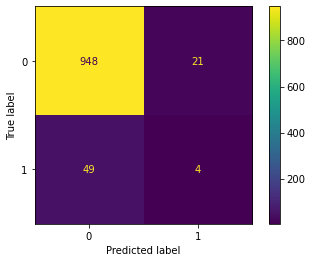

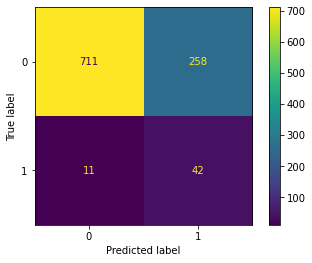

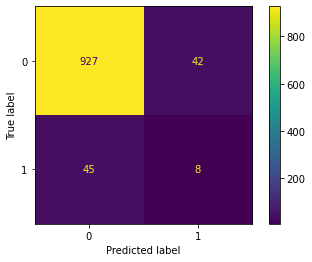

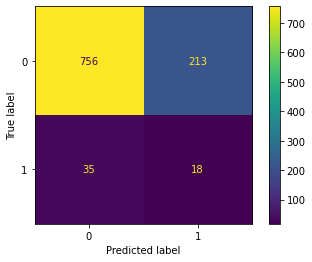

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = []
models.append(RandomForestClassifier(n_estimators=50))
# models.append(RandomForestClassifier(n_estimators=100))
# models.append(RandomForestClassifier(n_estimators=200))

# models.append(LogisticRegression(solver="saga", max_iter=1000, penalty='l1'))
models.append(LogisticRegression(solver="saga", max_iter=1000, penalty='l2'))
# models.append(LogisticRegression(solver="saga", max_iter=1000, penalty='elasticnet', l1_ratio=0.5))
# models.append(LogisticRegression(solver="saga", max_iter=1000, penalty='none'))

models.append(KNeighborsClassifier(weights='distance', n_neighbors=2))
# models.append(KNeighborsClassifier(weights='distance', n_neighbors=5))
# models.append(KNeighborsClassifier(weights='distance', n_neighbors=10))
# models.append(KNeighborsClassifier(weights='distance', n_neighbors=50))

# models.append(SVC(gamma='auto', C=1.0))
# models.append(SVC(gamma='auto', C=10.0))
# models.append(SVC(gamma='auto', C=100.0))
models.append(SVC(gamma='auto', C=1000.0))

for model in models:
    print(model)
    model.fit(x_train, y_train)

    score = model.predict(x_test)
    print(classification_report(y_test, score))

    scores = cross_val_score(model, x_train, y_train, cv=5)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    print(confusion_matrix(y_test,score))

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,score))
    disp.plot()

    print('='*60)